<a href="https://colab.research.google.com/github/harshavardhangadila/Training-Neural-networks-with-Keras/blob/main/Part%201/K_5_Tabular_Data_Augmentation_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required packages
!pip install -q scikit-learn imbalanced-learn

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [3]:
# Load dataset
adult = fetch_openml(name='adult', version=2, as_frame=True)

X = adult.data
y = adult.target

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (48842, 14)
Shape of y: (48842,)


In [4]:
# Drop rows with missing values
X = X.replace('?', np.nan)
X = X.dropna()
y = y[X.index]

# Encode categorical variables
X = pd.get_dummies(X)

# Encode target labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

print(f"Shape after preprocessing: {X.shape}")


Shape after preprocessing: (45222, 105)


In [5]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 31655
Testing samples: 13567


In [6]:
# Apply SMOTE augmentation
smote = SMOTE(random_state=42)
X_train_aug, y_train_aug = smote.fit_resample(X_train, y_train)

print(f"Training samples after SMOTE: {X_train_aug.shape[0]}")


Training samples after SMOTE: 47546


In [7]:
# Build and train Random Forest on original data
clf_normal = RandomForestClassifier(random_state=42)
clf_normal.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
# Build and train Random Forest on augmented data
clf_aug = RandomForestClassifier(random_state=42)
clf_aug.fit(X_train_aug, y_train_aug)


RandomForestClassifier(random_state=42)

In [9]:
# Predictions
y_pred_normal = clf_normal.predict(X_test)
y_pred_aug = clf_aug.predict(X_test)

# Classification reports
print("Classification Report (Original Data):")
print(classification_report(y_test, y_pred_normal))

print("Classification Report (Augmented Data):")
print(classification_report(y_test, y_pred_aug))


Classification Report (Original Data):
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     10241
           1       0.73      0.63      0.67      3326

    accuracy                           0.85     13567
   macro avg       0.81      0.78      0.79     13567
weighted avg       0.85      0.85      0.85     13567

Classification Report (Augmented Data):
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     10241
           1       0.66      0.71      0.68      3326

    accuracy                           0.84     13567
   macro avg       0.78      0.79      0.79     13567
weighted avg       0.84      0.84      0.84     13567



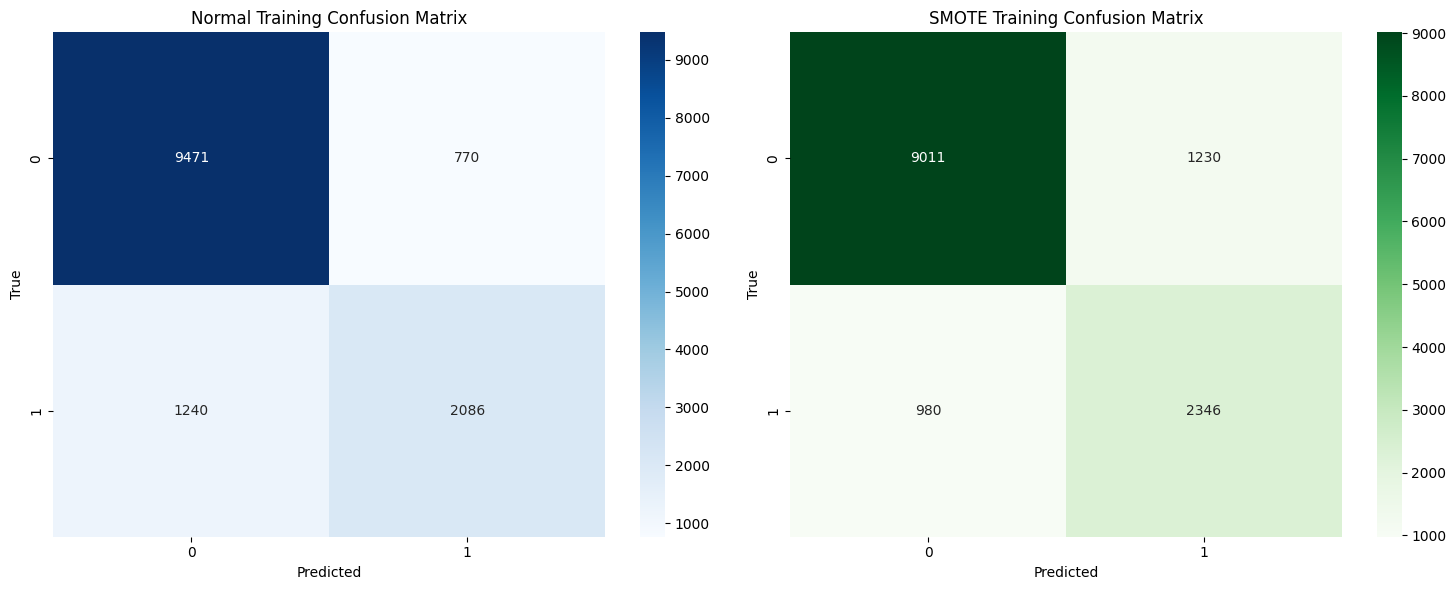

In [10]:
# Import seaborn
import seaborn as sns

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.heatmap(confusion_matrix(y_test, y_pred_normal), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Normal Training Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("True")

sns.heatmap(confusion_matrix(y_test, y_pred_aug), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("SMOTE Training Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("True")

plt.tight_layout()
plt.show()
